In [1]:
import sys
import os

def get_FGCE_Directory():
    """Get the path of the 'FGCE-Feasible-Group-Counterfactual-Explanations-for-Auditing-Fairness' directory."""
    current_dir = os.getcwd()
    target_dir = 'FGCE-Feasible-Group-Counterfactual-Explanations-for-Auditing-Fairness'
    
    while os.path.basename(current_dir) != target_dir:
        current_dir = os.path.dirname(current_dir)
        if current_dir == os.path.dirname(current_dir):
            return None
        
    return current_dir

def get_system_slash():
    """Get the system-specific directory separator."""
    return os.sep

FGCE_DIR = get_FGCE_Directory()
sys.path.append(FGCE_DIR)
sep = get_system_slash()
sys.path.append(FGCE_DIR + get_system_slash() + 'src')
from main import *

2024-05-21 03:40:51.151728: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-21 03:40:51.151753: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-21 03:40:51.152575: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-21 03:40:51.156785: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-21 03:40:51.685151: W tensorflow/compiler/tf2

In [2]:
dataset_feature_descriptions = {
    "Student": {
        "sex": "Student's sex",
        "age": "Student's age",
        "Medu": "Mother's education level",
        "Fedu": "Father's education level",
        "Mjob": "Mother's job",
        "Fjob": "Father's job",
        "reason": "Reason to choose this school",
        "guardian": "Student's guardian",
        "traveltime": "Travel time to school",
        "studytime": "Weekly study time",
        "failures": "Num. of past class failures",
        "schoolsup": "Extra educational support",
        "famsup": "Family educational support",
        "paid": "Extra paid classes within the course subject",
        'activities': "Extra-curricular activities",
        "nursery": "Attended nursery school",
        "higher": "Wants to take higher education",
        "internet": "Access to internet at home",
        "romantic": "In a romantic relationship",
        "famrel": "Quality of family relationships",
        "freetime": "Free time after school",
        "goout": "Going out with friends",
        'Dalc': 'Workday alcohol consumption',
        'Walc': 'Weekend alcohol consumption',
        "health": "Current health status",
        "absences": "Num. of school absences",
    },
    "Compas": {
        "sex": "Defendant's sex",
        "age": "Defendant's age",
        "juv_fel_count": "Num. of juvenile felonies",
        "juv_misd_count": "Num. of juvenile misdemeanors",
        "juv_other_count": "Num. of other juvenile offenses",
        "priors_count": "Num. of prior charges",
        "age_cat": "Defendant's age category",
        "race": "Defendant's race",
        "c_charge_degree": "Degree of the charge",
        "c_charge_desc": "Description of the charge"
    },
    "Heloc": {
        "AverageMInFile": "Average months in file for all tradelines",
        "NetFractionInstallBurden": "Net fraction of installment credit to credit limit",
        "NetFractionRevolvingBurden": "Net fraction of revolving credit to credit limit",
        "PercentInstallTrades": "Installment trades (%)",
        "PercentTradesWBalance": "Trades with balance (%)",
        "NumTotalTrades": "Total number of credit trades",
        "MSinceMostRecentDelq": "Months since most recent delinquency",
        "NumSatisfactoryTrades": "Num. of satisfactory credit trades",
        "PercentTradesNeverDelq": "Trades that have never been delinquent (%)",

        "NumTradesOpeninLast12M": "Num. of trades opened in last 12 months",
        "MSinceMostRecentTradeOpen": "Months since most recent trade open",

        "ExternalRiskEstimate": "Risk estimate from external source",
        "MSinceOldestTradeOpen": "Months since oldest trade open",
        "NumTrades60Ever2DerogPubRec": "Num. of trades 60+ ever 2 derogatory public records",
        "NumTrades90Ever2DerogPubRec": "Num. of trades 90+ ever 2 derogatory public records",
        "MaxDelq2PublicRecLast12M": "Max delinquency in 12 months",
        "MaxDelqEver": "Max delinquency ever",
        "NumTotalTradesOpenLast12M": "Num. of total trades open in last 12 months",
        "MSinceMostRecentInqexcl7days": "Months since most recent inquiry excluding 7 days",
        "NumInqLast6M": "Num. of inquiries in last 6 months",
        "NumInqLast6Mexcl7days": "Num. of inquiries in last 6 months excluding 7 days",

        "NumRevolvingTradesWBalance": "Num. of revolving trades with balance",
        "NumInstallTradesWBalance": "Num. of installment trades with balance",
        "NumBank2NatlTradesWHighUtilization": "Num. of bank/national trades with high utilization",
    },
        "Adult": {
        "age": "Age",
        "workclass": "Type of work",
        "sex": "Sex",
        "Capital Gain": "Capital gain",
        "Capital Loss": "Capital loss",
        "hours_per_week": "Hours worked per week",
        "education": "Education level",
        "education_num": "Years of Education",
        "marital_status": "Marital status",
        "occupation": "Occupation",
        "relationship": "Relationship status"
    }
}
dataset_one_hot_mapping = {
    "Student": {
        "Mjob": {
            "0": "teacher",
            "1": "health",
            "2": "services",
            "3": "at_home",
            "4": "other"
        },
        "Fjob": {
            "0": "teacher",
            "1": "health",
            "2": "services",
            "3": "at_home",
            "4": "other"
        },
        "guardian": {
            "0": "mother",
            "1": "father",
            "2": "other"
        },
        "reason": {
            '0': 'course',
            '1': 'other',
            '2': 'home',
            '3': 'reputation'
        }
    },
    "Compas": {
        "race": {
            "0": "Other",
            "1": "African-American",
            "2": "Caucasian",
            "3": "Hispanic",
            "4": "Asian",
            "5": "Native American"
        },
        "age_cat": {
            "0": "Less than 25",
            "1": "25-45",
            "2": "Greater than 45"
        }
    },
    "Adult":{}
}

In [3]:
def generate_recourse_rules(dataframe, results, FEATURE_COLUMNS, datasetName):
    processed_features = set()

    group_actions = {}
    
    for group_id, group_stats in results.items():
        if group_id in ["Node Connectivity", "Edge Connectivity", "Total coverage", "Graph Stats"]: 
            continue

        total_action_for_group = []
        
        for fn_id, cfe_details in group_stats.items():
            try:
                fn_id = int(fn_id)
            except ValueError:
                continue  # Skip non-FN keys
            
            fn_vector = dataframe.loc[fn_id, FEATURE_COLUMNS]
            cfe_vector = dataframe.loc[cfe_details['CFE_name'], FEATURE_COLUMNS]
            
            actions = [(col, fn_vector[col], cfe_vector[col]) for col in FEATURE_COLUMNS if fn_vector[col] != cfe_vector[col]]

            actions = []
            for col in FEATURE_COLUMNS:
                if fn_vector[col] != cfe_vector[col]:
                    # handle one-hot encoded features
                    if datasetName != "Heloc" and any(col.startswith(key) for key in dataset_one_hot_mapping[datasetName].keys()):
                        main_feature, value = col.rsplit('_', 1)
                        if main_feature in processed_features:
                            continue
                        else:
                            processed_features.add(main_feature)
                            actions.append((main_feature, 0, 1))
                    else:
                        if col in dataset_feature_descriptions[datasetName]:
                            actions.append((dataset_feature_descriptions[datasetName][col], fn_vector[col], cfe_vector[col]))
                        else:
                            actions.append((col, fn_vector[col], cfe_vector[col]))
                    
                        
            
            total_action_for_group.append(actions)

        group_actions[group_id] = total_action_for_group
    return group_actions

def sort_actions_by_frequency(dataframe, actions_for_group):
    action_frequency = {}
    action_frequency_increment = {}
    for groupofactions in actions_for_group:
        for action in groupofactions:
            if action[0] in action_frequency:
                action_frequency[action[0]] += 1
            else:
                action_frequency[action[0]] = 1

            if action[0] in action_frequency_increment:
                action_frequency_increment[action[0]] += abs(action[1] - action[2])
            else:
                action_frequency_increment[action[0]] = abs(action[1] - action[2])

    total_actions = len(actions_for_group)
    action_frequency = {k: (v / total_actions) *100 for k, v in action_frequency.items()}
    action_frequency_increment = {k: (v / total_actions) *100 for k, v in action_frequency_increment.items()}


    action_frequency = dict(sorted(action_frequency.items(), key=lambda item: item[1], reverse=True))
    action_frequency_increment = dict(sorted(action_frequency_increment.items(), key=lambda item: item[1], reverse=True))
    return action_frequency, action_frequency_increment

In [4]:
import matplotlib.pyplot as plt

def plot_feature_frequency(dataset_name, action_frequency_g0, action_frequency_g1, action_frequency_increment_g0, action_frequency_increment_g1, dataset_feature_descriptions, sx, sy, freq_threshold=None):
    filtered_keys_g0 = set(key for key, value in action_frequency_g0.items() if freq_threshold is None or value > freq_threshold)
    filtered_keys_g1 = set(key for key, value in action_frequency_g1.items() if freq_threshold is None or value > freq_threshold)
    filtered_keys = filtered_keys_g0.union(filtered_keys_g1)
    
    y_combined = range(len(filtered_keys))                 
    bar_width = 0.3

    plt.figure(figsize=(sx, sy))
    plt.barh(y_combined, [action_frequency_g0.get(key, 0) for key in filtered_keys], height=bar_width, color='r', align='center')
    plt.barh([y + bar_width for y in y_combined], [action_frequency_g1.get(key, 0) for key in filtered_keys], height=bar_width, color='g', align='center')
    plt.ylabel('Feature Description', fontsize=12)
    plt.xlabel('Frequency (%)', fontsize=12)
    plt.legend(['Group 0', 'Group 1'])
    plt.yticks([y + bar_width / 2 for y in y_combined], [dataset_feature_descriptions[dataset_name].get(key, key) for key in filtered_keys], fontsize=12)
    plt.xticks(fontsize=12)
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.grid(axis='x')
    plt.tight_layout()
    fig_size = (8, 6) 
    plt.gcf().set_size_inches(fig_size)
    if not os.path.exists(f"{FGCE_DIR}{sep}tmp{sep}{dataset_name}{sep}figs"):
        os.makedirs(f"{FGCE_DIR}{sep}tmp{sep}{dataset_name}{sep}figs")
    plt.savefig(f"{FGCE_DIR}{sep}tmp{sep}{dataset_name}{sep}figs{sep}attribution.pdf")
    plt.show()

# Student

In [ ]:
results, data_np, attr_col_mapping, data_df_copy, face_vector_distances, gface_vector_distances, same_cfe_found, gcfes_that_are_cfes = \
                main_cost_constrained_GCFEs(epsilon=3, tp=0.6, td=0.001, datasetName='Student', group_identifier='sex',
                            skip_model_training=True, skip_gcfe_calculation=False, skip_graph_creation=True,
                            max_d = 3.99, cost_function = "max_vector_distance", k=2, k_selection_method="greedy_accross_all_ccs")

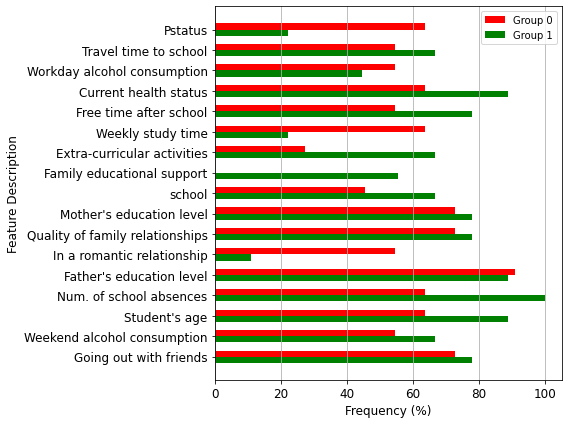

In [7]:
actions = generate_recourse_rules(data_df_copy, results, data_df_copy.columns, 'Student')
try:
    action_frequency_g0, action_frequency_increment_g0 = sort_actions_by_frequency(data_df_copy, actions['0.0'])
    action_frequency_g1, action_frequency_increment_g1 = sort_actions_by_frequency(data_df_copy, actions['1.0'])
except:
    action_frequency_g0, action_frequency_increment_g0 = sort_actions_by_frequency(data_df_copy, actions[0.0])
    action_frequency_g1, action_frequency_increment_g1 = sort_actions_by_frequency(data_df_copy, actions[1.0])
plot_feature_frequency("Student", action_frequency_g0, action_frequency_g1, action_frequency_increment_g0, action_frequency_increment_g1, dataset_feature_descriptions, 8, 6, freq_threshold=50)

# Heloc

In [ ]:
results, data_np, attr_col_mapping, data_df_copy, face_vector_distances, gface_vector_distances, same_cfe_found, gcfes_that_are_cfes = \
                main_cost_constrained_GCFEs(epsilon=0.7, tp=0.6, td=0.001, datasetName='Heloc',
                            group_identifier='MaxDelqEver', group_identifier_value=5,
                            skip_model_training=True, skip_gcfe_calculation=False, skip_graph_creation=True,
                            max_d = 1.55, cost_function = "max_vector_distance", k=3, k_selection_method="greedy_accross_all_ccs")

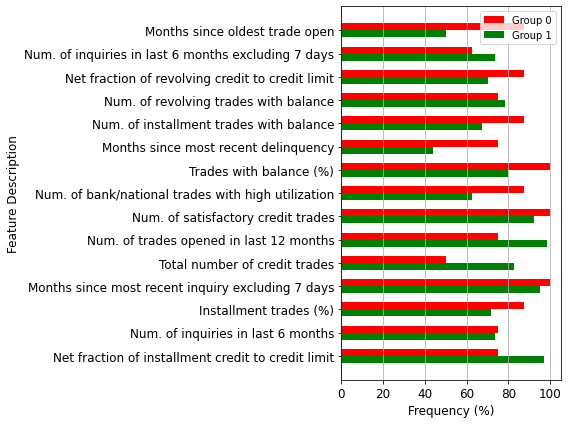

In [10]:
actions = generate_recourse_rules(data_df_copy, results, data_df_copy.columns, "Heloc")
action_frequency_g0, action_frequency_increment_g0 = sort_actions_by_frequency(data_df_copy, actions["0.75_less"])
action_frequency_g1, action_frequency_increment_g1 = sort_actions_by_frequency(data_df_copy, actions["0.75_greater"])
plot_feature_frequency("Heloc", action_frequency_g0, action_frequency_g1, action_frequency_increment_g0, action_frequency_increment_g1, dataset_feature_descriptions, 8, 6,  freq_threshold=50)

# Compas

In [ ]:
results, data_np, attr_col_mapping, data_df_copy, face_vector_distances, gface_vector_distances, same_cfe_found, gcfes_that_are_cfes = \
                main_cost_constrained_GCFEs(epsilon=0.3, tp=0.6, td=0.001, datasetName='Compas',
                            group_identifier='sex',
                            skip_model_training=True, skip_gcfe_calculation=False, skip_graph_creation=True,
                            max_d = 0.62, cost_function = "max_vector_distance", k=3, k_selection_method="greedy_accross_all_ccs")

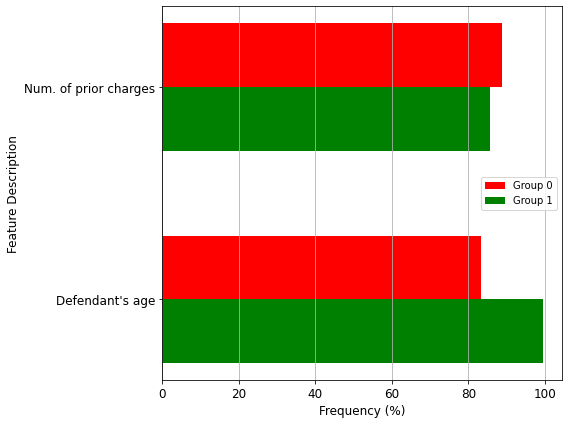

In [12]:
actions = generate_recourse_rules(data_df_copy, results, data_df_copy.columns, "Compas")
try:
    action_frequency_g0, action_frequency_increment_g0 = sort_actions_by_frequency(data_df_copy, actions['0.0'])
    action_frequency_g1, action_frequency_increment_g1 = sort_actions_by_frequency(data_df_copy, actions['1.0'])
except:
    action_frequency_g0, action_frequency_increment_g0 = sort_actions_by_frequency(data_df_copy, actions[0.0])
    action_frequency_g1, action_frequency_increment_g1 = sort_actions_by_frequency(data_df_copy, actions[1.0])
plot_feature_frequency("Compas", action_frequency_g0, action_frequency_g1, action_frequency_increment_g0, action_frequency_increment_g1, dataset_feature_descriptions, 8, 6,  freq_threshold=50)

# Adult

In [ ]:
results, data_np, attr_col_mapping, data_df_copy, face_vector_distances, gface_vector_distances, same_cfe_found, gcfes_that_are_cfes = \
                main_cost_constrained_GCFEs(epsilon=0.3, tp=0.6, td=0.001, datasetName='Adult', group_identifier='sex',
                            skip_model_training=True, skip_gcfe_calculation=False, skip_graph_creation=True,
                            max_d = 4, cost_function = "max_vector_distance", k=3, k_selection_method="greedy_accross_all_ccs")

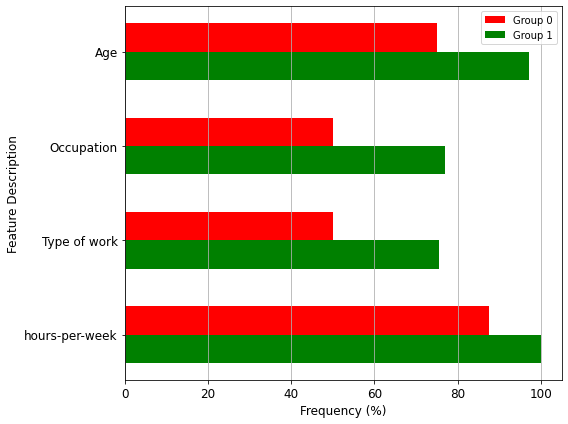

In [15]:
actions = generate_recourse_rules(data_df_copy, results, data_df_copy.columns, 'Adult')
try:
    action_frequency_g0, action_frequency_increment_g0 = sort_actions_by_frequency(data_df_copy, actions['0.0'])
    action_frequency_g1, action_frequency_increment_g1 = sort_actions_by_frequency(data_df_copy, actions['1.0'])
except:
    action_frequency_g0, action_frequency_increment_g0 = sort_actions_by_frequency(data_df_copy, actions[0.0])
    action_frequency_g1, action_frequency_increment_g1 = sort_actions_by_frequency(data_df_copy, actions[1.0])
plot_feature_frequency("Adult", action_frequency_g0, action_frequency_g1, action_frequency_increment_g0, action_frequency_increment_g1, dataset_feature_descriptions, 8, 6, freq_threshold=50)